## limpieza dataset

In [3]:
import pandas as pd
import numpy as np

### books

In [4]:
# leer el archivo BX-Books.csv
books = pd.read_csv('../data/BX-CSV-Dump/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

# reemplazar los valores "NULL" y "0" en el campo "Year of Publication" por NaN
books.loc[books['Year-Of-Publication'] == 'NULL', 'Year-Of-Publication'] = np.nan
books.loc[books['Year-Of-Publication'] == '0', 'Year-Of-Publication'] = np.nan

# eliminar las filas con información incompleta o incorrecta en los campos "Author" o "Publisher"
books.dropna(subset=['Book-Author', 'Publisher'], inplace=True)

# guardar el archivo limpio en un nuevo archivo CSV
books.to_csv('../data/BX-CSV-Dump/BX-Books-clean.csv', index=False)

C:\Users\polgracia\AppData\Local\Temp\ipykernel_14840\2824363386.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('../data/BX-CSV-Dump/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 1

In [5]:
books.head(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


### Users

In [6]:
import pandas as pd

# Carga del archivo BX-Users.csv en un DataFrame
users = pd.read_csv('../data/BX-CSV-Dump/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')

# Reemplazo de los valores "NULL" o en blanco en el campo "Age" por el valor "0"
users['Age'].replace(['NULL', ''], '0', inplace=True)

# Conversión del campo "Age" a tipo numérico
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')

# Guardado del DataFrame limpio en un nuevo archivo CSV
users.to_csv('../data/BX-CSV-Dump/BX-Users-Cleaned.csv', sep=';', index=False)


C:\Users\polgracia\AppData\Local\Temp\ipykernel_14840\3201448357.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('../data/BX-CSV-Dump/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')


In [7]:
users.head(4)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0


## Ratings

In [8]:
import pandas as pd

# Leer el archivo BX-Book-Ratings.csv
ratings = pd.read_csv('../data/BX-CSV-Dump/BX-Book-Ratings.csv', delimiter=';', encoding='latin-1')

# Eliminar filas donde Book-Rating es igual a cero
ratings = ratings[ratings['Book-Rating'] != 0]

# Guardar el archivo limpio como un nuevo archivo CSV
ratings.to_csv('../data/BX-CSV-Dump/BX-Book-Ratings-Cleaned.csv', sep=';', index=False, encoding='latin-1')


In [9]:
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## Geoplot

C:\Users\polgracia\AppData\Local\Temp\ipykernel_14840\2341724725.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_by_country['country'][users_by_country['country']=='usa'] = 'united states of america'


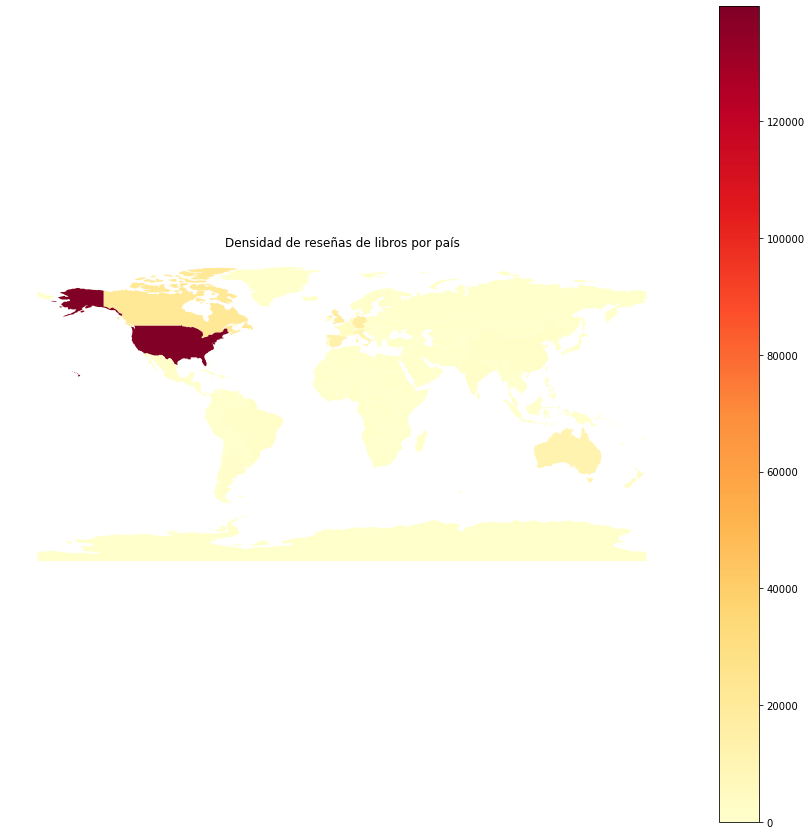

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# from descartes import PolygonPatch

# Leer el archivo BX-Users.csv
users = pd.read_csv('../data/BX-CSV-Dump/BX-Users-Cleaned.csv', sep=';', encoding='latin-1')

users['country'] = users['Location'].str.split(',').str[-1].str.strip()
# Contar el número de usuarios por país
users_by_country = users.groupby('country')['User-ID'].count().reset_index(name='User count')

#take big countries
users_by_country[(users_by_country['User count'] > 1000) & (users_by_country['country'])]
users_by_country['country'][users_by_country['country']=='usa'] = 'united states of america'

# Cargar el archivo de shapefile del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name'] = world['name'].str.lower()

# Unir los datos de usuarios con los datos del shapefile
users_geo = world.merge(users_by_country, left_on='name', right_on='country', how='left')
users_geo = users_geo.fillna(0)

# Crear un plot geográfico
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Densidad de reseñas de libros por país')

# Mostrar el mapa de calor de la densidad de usuarios
users_geo.plot(column='User count', cmap='YlOrRd', legend=True, ax=ax)

# Ocultar los ejes x e y
ax.axis('off')

# Mostrar el plot
plt.show()


### 2.2

In [11]:
users

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom
...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,usa
278854,278855,"tacoma, washington, united kingdom",50.0,united kingdom
278855,278856,"brampton, ontario, canada",NaN,canada
278856,278857,"knoxville, tennessee, usa",NaN,usa


In [12]:
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [13]:
#Unimos usuarios que hacen rates 

raters = pd.merge(ratings, users, on = 'User-ID', how = 'inner')

# Encontrar la edad del reseñador más joven
raters = raters[(~raters['Age'].isna()) & (raters['Age']>0)]
youngest_age = raters['Age'].min()

# Encontrar los orígenes geográficos de los reseñadores más jóvenes
youngest_reviewers = raters[raters['Age'] == youngest_age]['country'].unique()

print(f"Los orígenes geográficos de los reseñadores más jóvenes son: {', '.join(youngest_reviewers)}")
print(f"La edad del reseñador más joven es {youngest_age}")


Los orígenes geográficos de los reseñadores más jóvenes son: usa, greece, india, canada, spain, , italy, germany, united kingdom, japan, new zealand, australia, costa rica, portugal, switzerland
La edad del reseñador más joven es 1.0


In [14]:
raters

,User-ID,ISBN,Book-Rating,Location,Age,country
1,276729,052165615X,3,"rijeka, n/a, croatia",16.0,croatia
2,276729,0521795028,6,"rijeka, n/a, croatia",16.0,croatia
4,276737,0600570967,6,"sydney, new south wales, australia",14.0,australia
6,276745,342310538,10,"berlin, berlin, germany",27.0,germany
7,276747,0060517794,9,"iowa city, iowa, usa",25.0,usa
...,...,...,...,...,...,...
433628,276681,0609806491,7,"chicago, illinois, usa",43.0,usa
433629,276681,1931333246,10,"chicago, illinois, usa",43.0,usa
433668,276709,0515107662,10,"mannington, west virginia, usa",38.0,usa
433669,276721,0590442449,10,"providence, rhode island, usa",14.0,usa


### 3.1

In [15]:
authors = ['J. K. Rowling', 'George Orwell', 'Paula Danziger']# 'Stephen King']

In [16]:
books[books['Book-Author'].isin(authors)]['Book-Author'].value_counts()

J. K. Rowling     78
George Orwell     63
Paula Danziger    48
Name: Book-Author, dtype: int64

El clasificador Naive Bayes calcula la probabilidad de un evento en los siguientes pasos:

Paso 1: Calcular la probabilidad a priori para etiquetas de clase dadas.

Paso 2: Hallar la probabilidad probable con cada atributo para cada clase

Paso 3: Poner estos valores en la fórmula de Bayes y calcular la probabilidad posterior.

Paso 4: Ver qué clase tiene mayor probabilidad, dado que la entrada pertenece a la clase de mayor probabilidad.



In [17]:
#clean dataset with books and ratings

raters = pd.merge(ratings, users, on = 'User-ID', how = 'inner')
books_rating = pd.merge(books, raters, on ='ISBN', how = 'inner')
books_rating = books_rating.drop([c for c in books_rating.columns if 'URL' in c],axis = 1)
books_rating['Book-Author'] = books_rating['Book-Author'].str.strip()

books_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN,canada
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8,"n/a, n/a, n/a",NaN,n/a
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8,"toronto, ontario, canada",30.0,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9,"ottawa, ,",NaN,
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9,"kingston, ontario, canada",NaN,canada
...,...,...,...,...,...,...,...,...,...,...
383834,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,275318,10,"klamath falls, oregon, usa",49.0,usa
383835,1845170423,Cocktail Classics,David Biggs,2004,Connaught,275970,7,"pittsburgh, pennsylvania, usa",46.0,usa
383836,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,276313,5,"livermore, california, usa",36.0,usa
383837,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463,7,"providence, rhode island, usa",26.0,usa


In [18]:
books_rating[books_rating['Book-Author'].isin(authors)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,country
7665,0451526341,Animal Farm,George Orwell,2004,Signet,254,8,"minneapolis, minnesota, usa",24.0,usa
7666,0451526341,Animal Farm,George Orwell,2004,Signet,5922,9,"bozeman, montana, usa",19.0,usa
7667,0451526341,Animal Farm,George Orwell,2004,Signet,7346,8,"sunnyvale, california, usa",49.0,usa
7668,0451526341,Animal Farm,George Orwell,2004,Signet,10047,9,"big lake, minnesota, usa",20.0,usa
7669,0451526341,Animal Farm,George Orwell,2004,Signet,11676,10,"n/a, n/a, n/a",NaN,n/a
...,...,...,...,...,...,...,...,...,...,...
372062,0451518659,Nineteen Eighty-Four,George Orwell,1985,Signet Book,146230,10,"bourbonnais, ,",49.0,
373134,0151660344,Nineteen Eighty-Four: The Facsimile of the Ext...,George Orwell,1984,Harcourt,221724,9,"st. louis, missouri, usa",NaN,usa
379808,043955490X,Harry Potter and the Goblet of Fire (Harry Pot...,J. K. Rowling,2003,Arthur A. Levine Books,177284,10,"colorado springs, colorado, usa",30.0,usa
382456,0451520505,Nineteen Eighty-Four,George Orwell,1985,Signet Book,236172,6,"chesapeake, virginia, usa",34.0,usa


In [19]:
[c for c in le.classes_ if c in authors]

NameError: name 'le' is not defined

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
books_rating['author-encoded']= le.fit_transform(books_rating['Book-Author'])
#books_rating[books_rating['Book-Author'] == authors[0]]

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(books_rating['author-encoded'].to_numpy().reshape(-1, 1), books_rating['Book-Rating'])


GaussianNB()

In [ ]:
res = [(c, le.transform([c])) for c in le.classes_ if c in authors]
for r in res:
    nb = model.predict(r[1].reshape(-1,1))
    print(f'Basado en los ratings y naive bayes, la nota que pondrian los lectores a un libro nuevo de {r[0]} es {nb}')


Basado en los ratings y naive bayes, la nota que pondrian los lectores a un libro nuevo de George Orwell es [8]
Basado en los ratings y naive bayes, la nota que pondrian los lectores a un libro nuevo de J. K. Rowling es [8]
Basado en los ratings y naive bayes, la nota que pondrian los lectores a un libro nuevo de Paula Danziger es [8]


### 3.2

In [28]:
# from sklearn import preprocessing

raters = pd.merge(ratings, users, on = 'User-ID', how = 'inner')
books_rating = pd.merge(books, raters, on ='ISBN', how = 'inner')
books_rating = books_rating.drop([c for c in books_rating.columns if 'URL' in c],axis = 1)
books_rating['Book-Author'] = books_rating['Book-Author'].str.strip()

#seleccionar
df = books_rating[['User-ID', 'ISBN', 'Book-Rating']]
# Cambiar el nombre de las columnas
df = df.rename(columns={'User-ID': 'user_id', 'ISBN': 'item_id', 'Book-Rating': 'rating'})

'''
le = preprocessing.LabelEncoder()
df['item_id'] = le.fit_transform(df['item_id'])
'''
df.head()

,user_id,item_id,rating
0,8,39,5
1,11676,39,8
2,67544,39,8
3,116866,39,9
4,123629,39,9


In [31]:
from surprise import Dataset, Reader
from surprise import KNNBasic

# Crear un objeto Reader para leer los datos
reader = Reader(rating_scale=(1, 10))

# Crear el Dataset a partir del DataFrame y el Reader
data = Dataset.load_from_df(df, reader)

# A continuación, podemos utilizar un algoritmo de filtrado colaborativo basado en K-Vecinos más Cercanos (KNN) para encontrar los libros más similares a un libro de entrada dado. Por ejemplo, podemos crear una función que toma un ISBN de entrada y devuelve los 10 libros más similares basados en las calificaciones dadas por los usuarios:

# Entrenar el modelo KNN con los datos
trainset = data.build_full_trainset()
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Función para obtener los 10 libros más similares a un libro de entrada
def get_top_similar_books(isbn):
    # Obtener el ID del item a partir del ISBN
    item_inner_id = trainset.to_inner_iid(isbn)
    
    # Obtener las IDs y las similitudes de los vecinos más cercanos
    neighbors = algo.get_neighbors(item_inner_id, k=10)
    
    # Obtener los ISBNs correspondientes a las IDs de los vecinos
    neighbor_isbns = [trainset.to_raw_iid(inner_id) for inner_id in neighbors]
    
    return neighbor_isbns

NearestNeighbors(algorithm='ball_tree', n_neighbors=2)

In [ ]:
similar_books = get_top_similar_books('1408857863')